In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [9]:
df_compras = pd.read_excel('~/Documents/Ironhack/Modulo 2/LABS/Poryecto-Final-Marzo-23/datas/2019 ORDENES DE PRODUCCION jun_completo.xlsx')

C:\Users\sistemas\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [12]:
df_compras.head(2)

,Registrado:,Marca,No. de Proyecto:,Tipo de Proyecto:,Nombre del Vendedor:,Nombre del Cliente:,Tipo de Cliente:,Clasificación Cliente:,Fecha de Desempaque:,Fecha Producto Listo para Empaque:,Op Cotejada con Venta:,OP Registrada:,Observaciones:,OP verificada:,Proyecto Concluido:
0,2021-08-24 20:02:11,NUKS,BNB24082112 Ajustador NEGRO,PROYECTO,BRENDA LETICIA TORRES BARAJAS,MARKETPLACE RED BABOON,AAA,"Menor a $10,000",NaN,NaN,NaN,Sí,NaN,NaN,NaN
1,2021-08-24 20:01:39,NUKS,BNB24082111 Ajustador SUDKENY,PROYECTO,BRENDA LETICIA TORRES BARAJAS,MARKETPLACE SUDKENY PHARMA,AAA,"Menor a $10,000",NaN,NaN,NaN,Sí,NaN,NaN,NaN


In [13]:
df_compras.columns

Index(['Registrado:', 'Marca', 'No. de Proyecto:', 'Tipo de Proyecto:',
       'Nombre del Vendedor:', 'Nombre del Cliente:', 'Tipo de Cliente:',
       'Clasificación Cliente:', 'Fecha de Desempaque:',
       'Fecha Producto Listo para Empaque:', 'Op Cotejada con Venta:',
       'OP Registrada:', 'Observaciones:', 'OP verificada:',
       'Proyecto Concluido:'],
      dtype='object')

In [14]:
df_compras.columns = df_compras.columns.str.lower().str.replace('\(.*','').str.replace('\.','').str.replace('\:','').str.strip().str.replace(' ','_')

C:\Users\sistemas\AppData\Local\Temp\ipykernel_11612\3425969007.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_compras.columns = df_compras.columns.str.lower().str.replace('\(.*','').str.replace('\.','').str.replace('\:','').str.strip().str.replace(' ','_')
C:\Users\sistemas\AppData\Local\Temp\ipykernel_11612\3425969007.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_compras.columns = df_compras.columns.str.lower().str.replace('\(.*','').str.replace('\.','').str.replace('\:','').str.strip().str.replace(' ','_')
C:\Users\sistemas\AppData\Local\Temp\ipykernel_11612\3425969007.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_compras.columns = df_compras.columns.str.lower().str.replace('\(.*','').str.replace('\.','').str.replace('\:','').str.strip().str.replace(' ','_')


In [15]:
df_compras.columns

Index(['registrado', 'marca', 'no_de_proyecto', 'tipo_de_proyecto',
       'nombre_del_vendedor', 'nombre_del_cliente', 'tipo_de_cliente',
       'clasificación_cliente', 'fecha_de_desempaque',
       'fecha_producto_listo_para_empaque', 'op_cotejada_con_venta',
       'op_registrada', 'observaciones', 'op_verificada',
       'proyecto_concluido'],
      dtype='object')

In [16]:
df_compras.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5884 entries, 0 to 5883
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   registrado                         5882 non-null   datetime64[ns]
 1   marca                              5882 non-null   object        
 2   no_de_proyecto                     5881 non-null   object        
 3   tipo_de_proyecto                   5882 non-null   object        
 4   nombre_del_vendedor                5882 non-null   object        
 5   nombre_del_cliente                 5882 non-null   object        
 6   tipo_de_cliente                    5879 non-null   object        
 7   clasificación_cliente              5879 non-null   object        
 8   fecha_de_desempaque                0 non-null      float64       
 9   fecha_producto_listo_para_empaque  0 non-null      float64       
 10  op_cotejada_con_venta              0

In [17]:
df_compras.marca.value_counts()

NUKS                     2676
PROMOSOLUCIONES          2177
CASA DE LA BOLSA          235
BANANO TEXTIL             217
NUKS USA                  196
ART PROMOS                184
SQUEEZY                   150
NUKS USA/SMASH             44
PROMOSOLUCIONES/SMASH       1
SQUEEZY/SMASH               1
SMASH/PROMOS                1
Name: marca, dtype: int64

In [18]:
df_compras.tipo_de_proyecto.value_counts()

PROYECTO            5194
MUESTRA              441
PROYECTO COSTURA     196
MUESTRA COSTURA       51
Name: tipo_de_proyecto, dtype: int64

In [27]:
df_compras[(df_compras.marca=='NUKS') & (df_compras.tipo_de_proyecto == 'PROYECTO')].nombre_del_cliente.value_counts().head(10)

FARID               220
GALLOS              140
CKLASS               66
ADRIAN GUEVARA       45
FER                  45
Farid                44
NBA                  44
FERNANDO             35
MIGUEL HERNANDEZ     32
ABIGAIL AGISS        30
Name: nombre_del_cliente, dtype: int64

In [59]:
df_compras[(df_compras.marca=='NUKS') & (df_compras.tipo_de_proyecto == 'PROYECTO')].nombre_del_vendedor.value_counts()

ADRIANA MERCADO                 728
SALVADOR                        247
DIANA DEL OLMO                  237
YASTABETH GONZALEZ              236
Salvador Garcia                 161
                               ... 
ADRIANA MERCAD                    1
ELIZABETH VAZQUEZ ENRIQUEZ        1
MARIAN GONZALEZ}                  1
BRIAN GALINDO/ALLAN TRUJILLO      1
DINA DEL OLMO                     1
Name: nombre_del_vendedor, Length: 69, dtype: int64

In [87]:
lista_vendedores = list(df_compras[(df_compras.marca=='NUKS') & (df_compras.tipo_de_proyecto == 'PROYECTO')].nombre_del_vendedor.value_counts().index)

In [88]:
lista_vendedores

['ADRIANA MERCADO',
 'SALVADOR',
 'DIANA DEL OLMO',
 'YASTABETH GONZALEZ',
 'Salvador Garcia',
 'GUADALUPE ESQUIVEL',
 'ELIZABETH VAZQUEZ',
 'YESSICA COLIN',
 'ADRIANA',
 'JUAN CARLOS GARCIA',
 'Javier Martinez',
 'ABIGAIL AGISS',
 'Fernando Mendoza',
 'FERNANDO MENDOZA',
 'ISELA PECH',
 'JUAN CARLOS GARCÍA',
 'Edgar Correa',
 'SALVADOR GARCIA',
 'ADRIANA MERACDO',
 'Salvador GArcia',
 'BRIAN GALINDO',
 'Javier Mtz',
 'DAVID BAEZ',
 'adriana mercado',
 'YASTY GONZALEZ',
 'CARLOS VILLANUEVA',
 'DIAN DEL OLMO',
 'ADRIANA  MERCADO',
 'salvador Garcia',
 'Isela Pech',
 'EDGAR CORREA',
 'MARIAN GONZALEZ',
 'SHEILA HURTADO',
 'ADRIANAMERCADO',
 'Salvador Garcia Ortega',
 'BRENDA LETICIA TORRES BARAJAS',
 'YASTABETH VIRIDIANA',
 'YATABETH GONZALEZ',
 'ADRIANA  MERACDO',
 'Javiere Martinez',
 'JUAN CRALOS GARCIA',
 'Adriana mercado',
 'Javier Mrtinez',
 'adriana meracdo',
 'isela pech',
 'Javier Mtartinez',
 'YASTABTH GONZALEZ',
 'Salvadpr Garcia',
 'DIANA EL OLMO',
 'adriana',
 'Diana del Olm

In [94]:
lista_vendedores_2 = pd.DataFrame(lista_vendedores)
lista_vendedores_2.head(3)

,0
0,ADRIANA MERCADO
1,SALVADOR
2,DIANA DEL OLMO


In [95]:
def cambiar_nombre(num):
    num= str(num)
    num=num.lower()
    #print(type(num))
    if 'salva' in num:
        num = 'salvador garcia'
        #num = float(num)
        return num
    
    if 'olmo' in num:
        num = 'diana del olmo'
        #num = float(num)
        return num
    
    if 'adr' in num:
        num = 'adriana mercado'
        #num = float(num)
        return num
    
    if 'mer' in num:
        num = 'adriana mercado'
        #num = float(num)
        return num
    
    if 'fer' in num:
        num = 'fernando mendoza'
        #num = float(num)
        return num
    
    if 'jav' in num:
        num = 'javier martinez'
        #num = float(num)
        return num
    
    if 'yas' in num:
        num = 'yastabth gonzalez'
        #num = float(num)
        return num
    
    if 'yat' in num:
        num = 'yastabth gonzalez'
        #num = float(num)
        return num
    
    if 'sava' in num:
        num = 'salvador garcia'
        #num = float(num)
        return num
    
    if 'sal' in num:
        num = 'salvador garcia'
        #num = float(num)
        return num
    
    if 'mar' in num:
        num = 'marian gonzalez'
        #num = float(num)
        return num
    
    if 'brian' in num:
        num = 'brian galindo'
        #num = float(num)
        return num
    
    if 'juan' in num:
        num = 'juan carlos garcia'
        #num = float(num)
        return num
    
    if 'ang' in num:
        num = 'angelica islas miranda'
        #num = float(num)
        return num
    
    if 'abi' in num:
        num = 'abigail agis'
        #num = float(num)
        return num
    
    if 'elizabeth' in num:
        num = 'elizabeth vazquez'
        #num = float(num)
        return num
    
    
    else:
        #num = float(num)
        return num

In [96]:
lista_vendedores_2[0] = lista_vendedores_2[0].apply(cambiar_nombre)

In [97]:
lista_vendedores_2.value_counts()

adriana mercado                  14
salvador garcia                  12
diana del olmo                    6
yastabth gonzalez                 5
javier martinez                   5
angelica islas miranda            3
juan carlos garcia                3
isela pech                        3
abigail agis                      2
marian gonzalez                   2
fernando mendoza                  2
elizabeth vazquez                 2
edgar correa                      2
brian galindo                     2
guadalupe esquivel                1
david baez                        1
carlos villanueva                 1
sheila hurtado                    1
brenda leticia torres barajas     1
yessica colin                     1
dtype: int64

In [98]:
df_compras[(df_compras.marca=='PROMOSOLUCIONES')& (df_compras.tipo_de_proyecto == 'PROYECTO')].nombre_del_vendedor.value_counts()

ADRIAN GUEVARA                  250
GUILLERMO FLORES                152
JESSICA OSORIO                  143
ALEJANDRA PECH                  132
YANET FLORES                    123
                               ... 
MARISELA  HERNANDEZ               1
adriana mercado                   1
JESSIC ASORIO                     1
JAIR OROPEZA / BRIAN GALINDO      1
EDWIN PIÑA / BRIAN GALINDO        1
Name: nombre_del_vendedor, Length: 79, dtype: int64

In [101]:
lista_vendedores_promo = list(df_compras[(df_compras.marca=='PROMOSOLUCIONES')& (df_compras.tipo_de_proyecto == 'PROYECTO')].nombre_del_vendedor.value_counts().index)

In [102]:
lista_vendedores_promo

['ADRIAN GUEVARA',
 'GUILLERMO FLORES',
 'JESSICA OSORIO',
 'ALEJANDRA PECH',
 'YANET FLORES',
 'NORMA MARTINEZ',
 'ADRIANA MERCADO',
 'ABIGAIL AGISS',
 'ELIZABETH VAZQUEZ',
 'CARLOS ACOSTA',
 'BRIAN GALINDO',
 'LUIS CONTRERAS',
 'VIANEY SANCHEZ',
 'GUSTAVO ESTRADA',
 'VICTOR RAMOS',
 'MIGUEL HERNANDEZ',
 'CRISTIAN HERNANDEZ',
 'YESSICA COLIN',
 'MARISELA HERNANDEZ',
 'FRANCISCO RASCON',
 'Alexis Meza',
 'francisco rascon',
 'LUZ ADRIANA RAMIREZ ACOSTA',
 'ITZEL BALCAZAR',
 'Cristian Alexis',
 'FRANCISCO MARTINEZ',
 'LENY MOLINA',
 'ROGELIO FLORES',
 'JULIO JIMENEZ',
 'ANDRES PEREZ',
 'EDGAR RAMÍREZ',
 'ANA MORCOS',
 'andres perez',
 'MONICA AVILA',
 'ALLAN TRUJILLO',
 'GISSELA PONCE',
 'ADRIANA RAMIREZ',
 'CARMEN MOREY',
 'CYNTHIA GARCIA',
 'ELIZABETH VAZUEZ',
 'JAIR OROPEZA',
 'BRIAN GALINDO/JAIR OROPEZA',
 'JULIO JIMENEZ / KAM ANTONIO',
 'DANIELA ARGUETA',
 'BRIAN GALINDO / EDWIN PIÑA',
 'BRENDA LETICIA TORRES BARAJAS',
 'ADRIANA  MERCADO',
 'SHEILA HURTADO',
 'MONICA CORTES',
 'FRA

In [265]:
lista_vendedores_promo_2 = pd.DataFrame(lista_vendedores_promo)
lista_vendedores_promo_2.head(3)

,0
0,ADRIAN GUEVARA
1,GUILLERMO FLORES
2,JESSICA OSORIO


In [266]:
def cambiar_nombre_promo(num):
    num= str(num)
    num=num.lower()
    #print(type(num))
    if 'eliz' in num:
        num = 'ELIZABETH VAZQUEZ'
        #num = float(num)
        return num
    
    if 'rasc' in num:
        num = 'FRANCISCO RASCON'
        #num = float(num)
        return num
    
    if 'brian' in num:
        num = 'BRIAN GALINDO'
        #num = float(num)
        return num
    
    if 'merc' in num:
        num = 'ADRIANA MERCADO'
        #num = float(num)
        return num
    
    if 'os acos' in num:
        num = 'CARLOS ACOSTA'
        #num = float(num)
        return num
    
    if 'orio' in num:
        num = 'JESSICA OSORIO'
        #num = float(num)
        return num
    
    if 'mari' in num:
        num = 'MARISELA HERNANDEZ'
        #num = float(num)
        return num
    
    
    if 'jul' in num:
        num = 'JULIO JIMENEZ'
        #num = float(num)
        return num
    
    if 'guiller' in num:
        num = 'GUILLERMO FLORES'
        #num = float(num)
        return num
    
    if 'ramos' in num:
        num = 'VICTOR RAMOS'
        #num = float(num)
        return num
    
    if 'alex' in num:
        num = 'Alexis Meza'
        #num = float(num)
        return num
    
    if 'all' in num:
        num = 'Alexis Meza'
        #num = float(num)
        return num
    
    if 'leny' in num:
        num = 'LENY MOLINA'
        #num = float(num)
        return num
    
    if 'moni' in num:
        num = 'MONICA AVILA'
        #num = float(num)
        return num
    
    if 'fran' in num:
        num = 'FRANCISCO MARTINEZ'
        #num = float(num)
        return num
    
    else:
        #num = float(num)
        return num

In [267]:
lista_vendedores_promo_2[0] = lista_vendedores_promo_2[0].apply(cambiar_nombre_promo)

francisco martinez
francisco marytinez


In [268]:
lista_vendedores_promo_2.value_counts()

BRIAN GALINDO                    10
ADRIANA MERCADO                   6
MARISELA HERNANDEZ                5
Alexis Meza                       4
ELIZABETH VAZQUEZ                 3
CARLOS ACOSTA                     3
andres perez                      2
VICTOR RAMOS                      2
FRANCISCO MARTINEZ                2
MONICA AVILA                      2
JULIO JIMENEZ                     2
JESSICA OSORIO                    2
GUILLERMO FLORES                  2
FRANCISCO RASCON                  2
LENY MOLINA                       2
luz adriana ramirez acosta        1
isela pech                        1
itzel balcazar                    1
jair oropeza                      1
luis contreras                    1
luz adriana ramirez               1
yanet flores                      1
miguel hernandez                  1
norma martinez                    1
rogelio flores                    1
sheila hurtado                    1
vianey sanchez                    1
guadalupe esquivel          

# DIVIDIMOS LAS TABLAS EN NUKS Y PROMO

In [269]:
df_compras.columns

Index(['registrado', 'marca', 'no_de_proyecto', 'tipo_de_proyecto',
       'nombre_del_vendedor', 'nombre_del_cliente', 'tipo_de_cliente',
       'clasificación_cliente', 'fecha_de_desempaque',
       'fecha_producto_listo_para_empaque', 'op_cotejada_con_venta',
       'op_registrada', 'observaciones', 'op_verificada',
       'proyecto_concluido'],
      dtype='object')

In [274]:
df_compras.marca.value_counts()

NUKS                     2676
PROMOSOLUCIONES          2177
CASA DE LA BOLSA          235
BANANO TEXTIL             217
NUKS USA                  196
ART PROMOS                184
SQUEEZY                   150
NUKS USA/SMASH             44
PROMOSOLUCIONES/SMASH       1
SQUEEZY/SMASH               1
SMASH/PROMOS                1
Name: marca, dtype: int64

In [309]:
df_compras_nuks = df_compras[df_compras.marca == 'NUKS']

In [310]:
df_compras_promo = df_compras[df_compras.marca == 'PROMOSOLUCIONES']

# borrado de columnas no funcionales

In [311]:
df_compras_nuks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2676 entries, 0 to 5880
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   registrado                         2676 non-null   datetime64[ns]
 1   marca                              2676 non-null   object        
 2   no_de_proyecto                     2676 non-null   object        
 3   tipo_de_proyecto                   2676 non-null   object        
 4   nombre_del_vendedor                2676 non-null   object        
 5   nombre_del_cliente                 2676 non-null   object        
 6   tipo_de_cliente                    2675 non-null   object        
 7   clasificación_cliente              2675 non-null   object        
 8   fecha_de_desempaque                0 non-null      float64       
 9   fecha_producto_listo_para_empaque  0 non-null      float64       
 10  op_cotejada_con_venta              0

In [312]:
df_compras_nuks = df_compras_nuks.drop(columns=['fecha_de_desempaque','fecha_producto_listo_para_empaque',
                              'op_cotejada_con_venta','op_verificada','op_verificada','proyecto_concluido'])

In [313]:
df_compras_nuks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2676 entries, 0 to 5880
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   registrado             2676 non-null   datetime64[ns]
 1   marca                  2676 non-null   object        
 2   no_de_proyecto         2676 non-null   object        
 3   tipo_de_proyecto       2676 non-null   object        
 4   nombre_del_vendedor    2676 non-null   object        
 5   nombre_del_cliente     2676 non-null   object        
 6   tipo_de_cliente        2675 non-null   object        
 7   clasificación_cliente  2675 non-null   object        
 8   op_registrada          1040 non-null   object        
 9   observaciones          46 non-null     object        
dtypes: datetime64[ns](1), object(9)
memory usage: 230.0+ KB


In [314]:
df_compras_promo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2177 entries, 3 to 5883
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   registrado                         2177 non-null   datetime64[ns]
 1   marca                              2177 non-null   object        
 2   no_de_proyecto                     2177 non-null   object        
 3   tipo_de_proyecto                   2177 non-null   object        
 4   nombre_del_vendedor                2177 non-null   object        
 5   nombre_del_cliente                 2177 non-null   object        
 6   tipo_de_cliente                    2175 non-null   object        
 7   clasificación_cliente              2175 non-null   object        
 8   fecha_de_desempaque                0 non-null      float64       
 9   fecha_producto_listo_para_empaque  0 non-null      float64       
 10  op_cotejada_con_venta              0

In [315]:
df_compras_promo = df_compras_promo.drop(columns=['fecha_de_desempaque','fecha_producto_listo_para_empaque',
                              'op_cotejada_con_venta','op_verificada','op_verificada','proyecto_concluido'])

In [316]:
df_compras_promo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2177 entries, 3 to 5883
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   registrado             2177 non-null   datetime64[ns]
 1   marca                  2177 non-null   object        
 2   no_de_proyecto         2177 non-null   object        
 3   tipo_de_proyecto       2177 non-null   object        
 4   nombre_del_vendedor    2177 non-null   object        
 5   nombre_del_cliente     2177 non-null   object        
 6   tipo_de_cliente        2175 non-null   object        
 7   clasificación_cliente  2175 non-null   object        
 8   op_registrada          2124 non-null   object        
 9   observaciones          722 non-null    object        
dtypes: datetime64[ns](1), object(9)
memory usage: 187.1+ KB


# limpieza de columnas 

In [317]:
df_compras_nuks.nombre_del_vendedor.value_counts()

ADRIANA MERCADO       793
DIANA DEL OLMO        259
YASTABETH GONZALEZ    254
SALVADOR              249
Salvador Garcia       168
                     ... 
Salvadr Garcia          1
SAlvador Garcia         1
Diana del Olmo          1
Salador Garcia          1
DINA DEL OLMO           1
Name: nombre_del_vendedor, Length: 72, dtype: int64

In [321]:
def cambiar_nombre(num):
    num= str(num)
    num=num.lower()
    #print(type(num))
    if 'salva' in num:
        num = 'salvador garcia'
        #num = float(num)
        return num
    
    if 'olmo' in num:
        num = 'diana del olmo'
        #num = float(num)
        return num
    
    if 'adr' in num:
        num = 'adriana mercado'
        #num = float(num)
        return num
    
    if 'mer' in num:
        num = 'adriana mercado'
        #num = float(num)
        return num
    
    if 'fer' in num:
        num = 'fernando mendoza'
        #num = float(num)
        return num
    
    if 'jav' in num:
        num = 'javier martinez'
        #num = float(num)
        return num
    
    if 'yas' in num:
        num = 'yastabth gonzalez'
        #num = float(num)
        return num
    
    if 'yat' in num:
        num = 'yastabth gonzalez'
        #num = float(num)
        return num
    
    if 'sava' in num:
        num = 'salvador garcia'
        #num = float(num)
        return num
    
    if 'sal' in num:
        num = 'salvador garcia'
        #num = float(num)
        return num
    
    if 'mar' in num:
        num = 'marian gonzalez'
        #num = float(num)
        return num
    
    if 'brian' in num:
        num = 'brian galindo'
        #num = float(num)
        return num
    
    if 'juan' in num:
        num = 'juan carlos garcia'
        #num = float(num)
        return num
    
    if 'ang' in num:
        num = 'angelica islas miranda'
        #num = float(num)
        return num
    
    if 'abi' in num:
        num = 'abigail agis'
        #num = float(num)
        return num
    
    if 'elizabeth' in num:
        num = 'elizabeth vazquez'
        #num = float(num)
        return num
    
    
    else:
        #num = float(num)
        return num

In [322]:
df_compras_nuks.nombre_del_vendedor = df_compras_nuks.nombre_del_vendedor.apply(cambiar_nombre)

In [323]:
df_compras_nuks.nombre_del_vendedor.value_counts()

adriana mercado                  912
salvador garcia                  465
diana del olmo                   269
yastabth gonzalez                268
guadalupe esquivel               122
juan carlos garcia               109
elizabeth vazquez                 99
yessica colin                     95
javier martinez                   80
fernando mendoza                  77
abigail agis                      55
isela pech                        36
edgar correa                      30
brian galindo                     19
david baez                        13
angelica islas miranda             9
carlos villanueva                  9
marian gonzalez                    3
brenda leticia torres barajas      3
sheila hurtado                     2
camioneta verde                    1
Name: nombre_del_vendedor, dtype: int64

# IMPRESION NUKS 

In [365]:
df_ventas_nuks = df_compras_nuks.groupby('registrado').count()[['marca']]

In [366]:
df_ventas_nuks

,marca
registrado,
2019-08-01 10:47:47,1
2019-08-01 10:50:26,1
2019-08-01 10:50:33,1
2019-08-01 10:51:59,1
2019-08-01 11:24:35,1
...,...
2021-05-20 13:47:58,1
2021-06-22 14:18:33,1
2021-08-11 14:04:56,1


In [367]:
df_ventas_nuks = df_ventas_nuks.reset_index()

In [368]:
df_ventas_nuks['order_date'] = df_ventas_nuks.registrado.astype('datetime64[D]')

In [369]:
df_ventas_nuks

,registrado,marca,order_date
0,2019-08-01 10:47:47,1,2019-08-01
1,2019-08-01 10:50:26,1,2019-08-01
2,2019-08-01 10:50:33,1,2019-08-01
3,2019-08-01 10:51:59,1,2019-08-01
4,2019-08-01 11:24:35,1,2019-08-01
...,...,...,...
2671,2021-05-20 13:47:58,1,2021-05-20
2672,2021-06-22 14:18:33,1,2021-06-22
2673,2021-08-11 14:04:56,1,2021-08-11
2674,2021-08-24 20:01:39,1,2021-08-24


In [370]:
df_ventas_nuks = df_ventas_nuks.groupby('order_date').sum()

In [371]:
df_ventas_nuks

,marca
order_date,
2019-08-01,15
2019-08-02,9
2019-08-05,6
2019-08-06,11
2019-08-07,10
...,...
2021-05-04,1
2021-05-20,1
2021-06-22,1


<AxesSubplot:xlabel='order_date'>

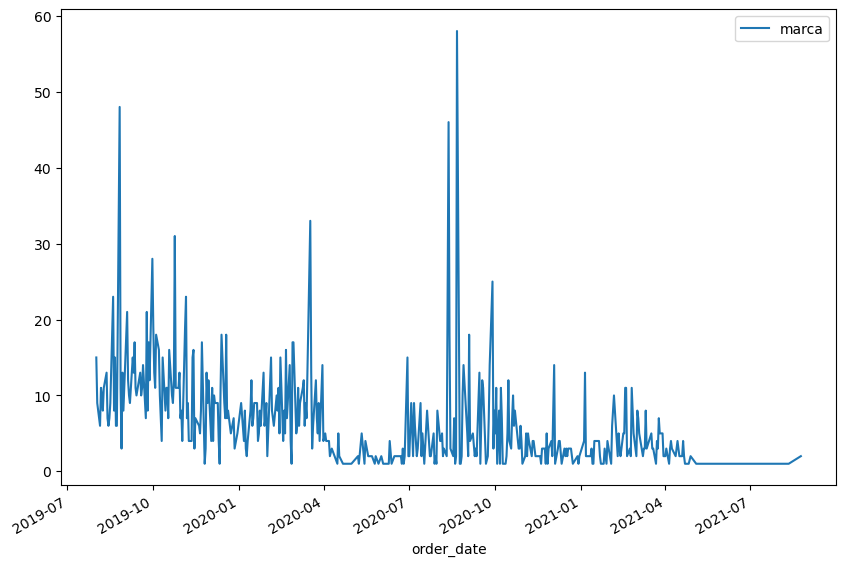

In [372]:
df_ventas_nuks.plot()

<AxesSubplot:xlabel='order_date'>

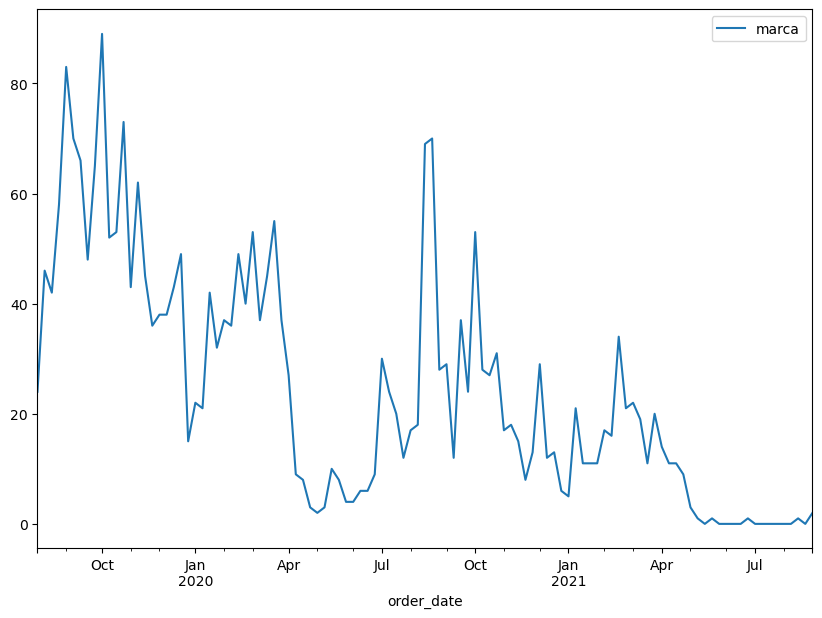

In [373]:

df_ventas_nuks.resample('W').sum().plot()

In [374]:
df_ventas_nuks_semanales = df_ventas_nuks.resample('W').sum()

In [375]:
import statsmodels.api as sm
import matplotlib

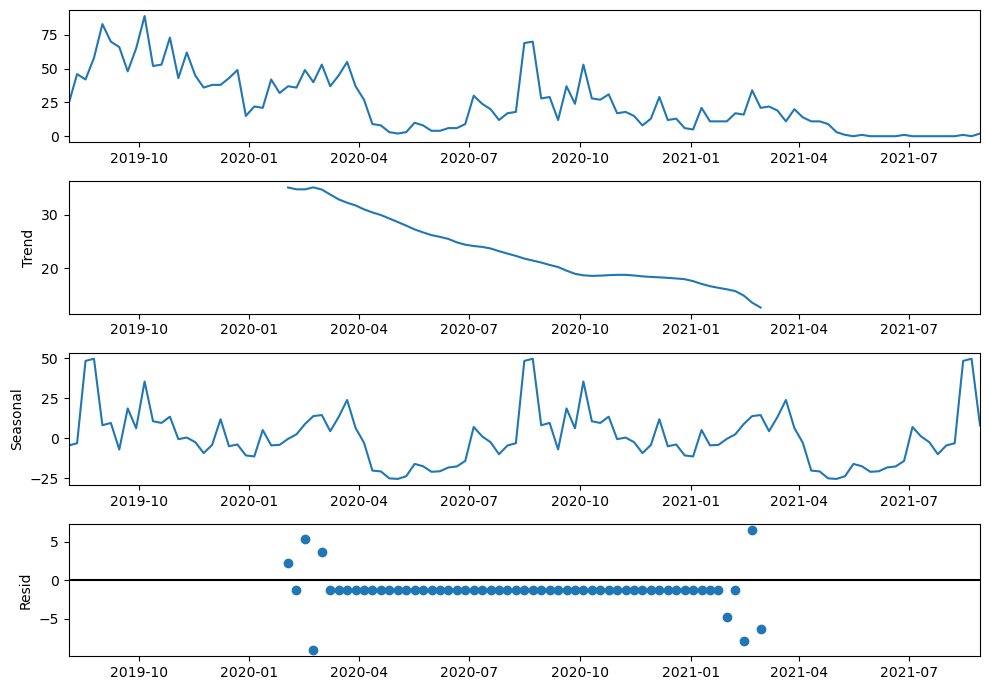

In [376]:
matplotlib.rcParams['figure.figsize'] = (10, 7)
descomp_serie = sm.tsa.seasonal_decompose(df_ventas_nuks_semanales)
descomp_serie.plot()
plt.show()

<AxesSubplot:xlabel='order_date'>

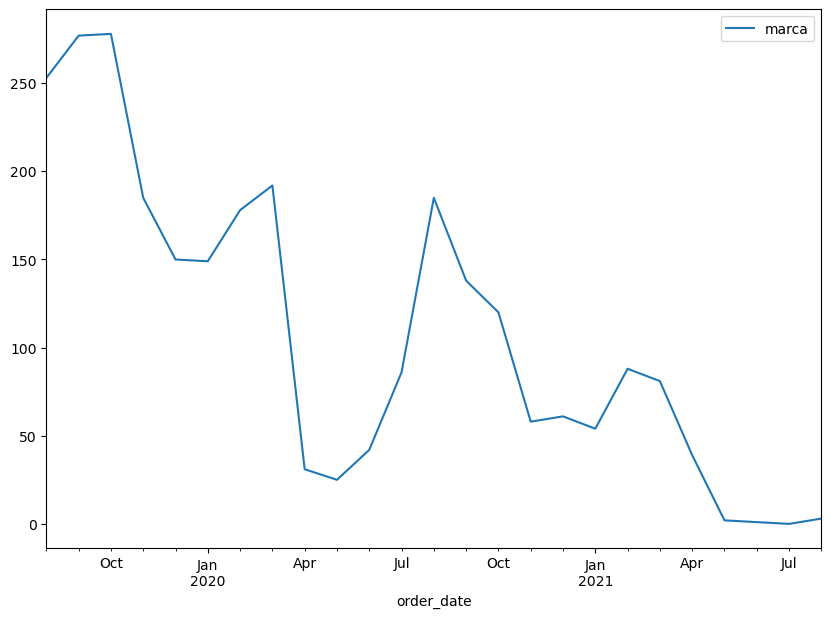

In [377]:
df_ventas_nuks.resample('M').sum().plot()